In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st

In [2]:
y   = load('../../March2021/Observation_models/ObsY.joblib') 
CNN = load('../../March2021/Observation_models/CNNY.joblib') 
LR  = load('../../March2021/Observation_models/LRY.joblib')
SVR  = load('../../March2021/Observation_models/SVRY.joblib')

ACCESS_CM2_CNN = load('ACCESS-CM2-CNN-Y1.joblib')
#ACCESS_CM2_LR = load('ACCESS-CM2-LR-Y.joblib')
#ACCESS_CM2_SVR = load('ACCESS-CM2-SVR-Y.joblib')

CanESM5_CNN = load('CanESM5-CNN-Y.joblib')
#CanESM5_LR = load('CanESM5-LR-Y.joblib')
#CanESM5_SVR = load('CanESM5-SVR-Y.joblib')

IITMESM_CNN = load('IITM-ESM-CNN-Y1.joblib')
#IITMESM_LR = load('IITM-ESM-LR-Y.joblib')
#IITMESM_SVR = load('IITM-ESM-SVR-Y.joblib')

INM_CM4_8_CNN = load('INM-CM4-8-CNN-Y.joblib')
#INM_CM4_8_LR = load('INM-CM4-8-LR-Y.joblib')
#INM_CM4_8_SVR = load('INM-CM4-8-SVR-Y.joblib')

INM_CM5_0_CNN = load('INM-CM5-0-CNN-Y.joblib')
#INM_CM5_0_LR = load('INM-CM5-0-LR-Y.joblib')
#INM_CM5_0_SVR = load('INM-CM5-0-SVR-Y.joblib')

IPSL_CM6A_LR_CNN = load('IPSL-CM6A-LR-CNN-Y1.joblib')
#IPSL_CM6A_LR_LR = load('IPSL-CM6A-LR-LR-Y.joblib')
#IPSL_CM6A_LR_SVR = load('IPSL-CM6A-LR-SVR-Y.joblib')

MIROC6_CNN = load('MIROC6-CNN-Y.joblib')
#MIROC6_LR = load('MIROC6-LR-Y.joblib')
#MIROC6_SVR = load('MIROC6-SVR-Y.joblib')

MRI_ESM2_0_CNN = load('MRI-ESM2-0-CNN-Y.joblib')
#MRI_ESM2_0_LR = load('MRI-ESM2-0-LR-Y.joblib')
#MRI_ESM2_0_SVR = load('MRI-ESM2-0-SVR-Y.joblib')

MPI_ESM1_2_LR_CNN = load('MPI-ESM1-2-LR-CNN-Y1.joblib')
#MPI_ESM1_2_LR_LR = load('MPI-ESM1-2-LR-LR-Y.joblib')
#MPI_ESM1_2_LR_SVR = load('MPI-ESM1-2-LR-SVR-Y.joblib')

MPI_ESM1_2_HR_CNN = load('MPI-ESM1-2-HR-CNN-Y.joblib')
#MPI_ESM1_2_HR_LR = load('MPI-ESM1-2-HR-LR-Y.joblib')
#MPI_ESM1_2_HR_SVR = load('MPI-ESM1-2-HR-SVR-Y.joblib')

EC_Earth3_CNN = load('EC-Earth3-CNN-Y1.joblib')
#EC_Earth3_LR = load('EC-Earth3-LR-Y.joblib')
#EC_Earth3_SVR = load('EC-Earth3-SVR-Y.joblib')
y

<xarray.DataArray 'fogdata' (time: 2418)>
array([0.32, 0.4 , 0.4 , ..., 0.24, 0.36, 0.36])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-12-31

In [3]:
y.values=y.where(y>=0.46,0)
CNN.values=CNN.where(CNN>=0.46,0)
LR.values=LR.where(LR>=0.46,0)
SVR.values=SVR.where(SVR>=0.46,0)

ACCESS_CM2_CNN.values=ACCESS_CM2_CNN.where(ACCESS_CM2_CNN>=0.46,0)
#ACCESS_CM2_LR.values=ACCESS_CM2_LR.where(ACCESS_CM2_LR>=0.46,0)
#ACCESS_CM2_SVR.values=ACCESS_CM2_SVR.where(ACCESS_CM2_SVR>=0.46,0)

CanESM5_CNN.values=CanESM5_CNN.where(CanESM5_CNN>=0.46,0)
#CanESM5_LR.values=CanESM5_LR.where(CanESM5_LR>=0.46,0)
#CanESM5_SVR.values=CanESM5_SVR.where(CanESM5_SVR>=0.46,0)

INM_CM4_8_CNN.values=INM_CM4_8_CNN.where(INM_CM4_8_CNN>=0.46,0)
#INM_CM4_8_LR.values=INM_CM4_8_LR.where(INM_CM4_8_LR>=0.46,0)
#INM_CM4_8_SVR.values=INM_CM4_8_SVR.where(INM_CM4_8_SVR>=0.46,0)

IITMESM_CNN.values=IITMESM_CNN.where(IITMESM_CNN>=0.46,0)
#IITMESM_LR.values=IITMESM_LR.where(IITMESM_LR>=0.46,0)
#IITMESM_SVR.values=IITMESM_SVR.where(IITMESM_SVR>=0.46,0)

INM_CM5_0_CNN.values=INM_CM5_0_CNN.where(INM_CM5_0_CNN>=0.46,0)
#INM_CM5_0_LR.values=INM_CM5_0_LR.where(INM_CM5_0_LR>=0.46,0)
#INM_CM5_0_SVR.values=INM_CM5_0_SVR.where(INM_CM5_0_SVR>=0.46,0)

IPSL_CM6A_LR_CNN.values=IPSL_CM6A_LR_CNN.where(IPSL_CM6A_LR_CNN>=0.46,0)
#IPSL_CM6A_LR_LR.values=IPSL_CM6A_LR_LR.where(IPSL_CM6A_LR_LR>=0.46,0)
#IPSL_CM6A_LR_SVR.values=IPSL_CM6A_LR_SVR.where(IPSL_CM6A_LR_SVR>=0.46,0)

MIROC6_CNN.values=MIROC6_CNN.where(MIROC6_CNN>=0.46,0)
#MIROC6_LR.values=MIROC6_LR.where(MIROC6_LR>=0.46,0)
#MIROC6_SVR.values=MIROC6_SVR.where(MIROC6_SVR>=0.46,0)

MRI_ESM2_0_CNN.values=MRI_ESM2_0_CNN.where(MRI_ESM2_0_CNN>=0.46,0)
#MRI_ESM2_0_LR.values=MRI_ESM2_0_LR.where(MRI_ESM2_0_LR>=0.46,0)
#MRI_ESM2_0_SVR.values=MRI_ESM2_0_SVR.where(MRI_ESM2_0_SVR>=0.46,0)

MPI_ESM1_2_LR_CNN.values=MPI_ESM1_2_LR_CNN.where(MPI_ESM1_2_LR_CNN>=0.46,0)
#MPI_ESM1_2_LR_LR.values=MPI_ESM1_2_LR_LR.where(MPI_ESM1_2_LR_LR>=0.46,0)
#MPI_ESM1_2_LR_SVR.values=MPI_ESM1_2_LR_SVR.where(MPI_ESM1_2_LR_SVR>=0.46,0)

MPI_ESM1_2_HR_CNN.values=MPI_ESM1_2_HR_CNN.where(MPI_ESM1_2_HR_CNN>=0.46,0)
#MPI_ESM1_2_HR_LR.values=MPI_ESM1_2_HR_LR.where(MPI_ESM1_2_HR_LR>=0.46,0)
#MPI_ESM1_2_HR_SVR.values=MPI_ESM1_2_HR_SVR.where(MPI_ESM1_2_HR_SVR>=0.46,0)

EC_Earth3_CNN.values=EC_Earth3_CNN.where(EC_Earth3_CNN>=0.46,0)
#EC_Earth3_LR.values=EC_Earth3_LR.where(EC_Earth3_LR>=0.46,0)
#EC_Earth3_SVR.values=EC_Earth3_SVR.where(EC_Earth3_SVR>=0.46,0)

y

<xarray.DataArray 'fogdata' (time: 2418)>
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-12-31

In [4]:
y.values=y.where(y==0.0,1)
CNN.values=CNN.where(CNN==0.0,1)
LR.values=LR.where(LR==0.0,1)
SVR.values=SVR.where(SVR==0.0,1)

ACCESS_CM2_CNN.values=ACCESS_CM2_CNN.where(ACCESS_CM2_CNN==0.0,1)
#ACCESS_CM2_LR.values=ACCESS_CM2_LR.where(ACCESS_CM2_LR==0.0,1)
#ACCESS_CM2_SVR.values=ACCESS_CM2_SVR.where(ACCESS_CM2_SVR==0.0,1)

CanESM5_CNN.values=CanESM5_CNN.where(CanESM5_CNN==0.0,1)
#CanESM5_LR.values=CanESM5_LR.where(CanESM5_LR==0.0,1)
#CanESM5_SVR.values=CanESM5_SVR.where(CanESM5_SVR==0.0,1)

INM_CM4_8_CNN.values=INM_CM4_8_CNN.where(INM_CM4_8_CNN==0.0,1)
#INM_CM4_8_LR.values=INM_CM4_8_LR.where(INM_CM4_8_LR==0.0,1)
#INM_CM4_8_SVR.values=INM_CM4_8_SVR.where(INM_CM4_8_SVR==0.0,1)

IITMESM_CNN.values=IITMESM_CNN.where(IITMESM_CNN==0.0,1)
#IITMESM_LR.values=IITMESM_LR.where(IITMESM_LR==0.0,1)
#IITMESM_SVR.values=IITMESM_SVR.where(IITMESM_SVR==0.0,1)

INM_CM5_0_CNN.values=INM_CM5_0_CNN.where(INM_CM5_0_CNN==0.0,1)
#INM_CM5_0_LR.values=INM_CM5_0_LR.where(INM_CM5_0_LR==0.0,1)
#INM_CM5_0_SVR.values=INM_CM5_0_SVR.where(INM_CM5_0_SVR==0.0,1)

IPSL_CM6A_LR_CNN.values=IPSL_CM6A_LR_CNN.where(IPSL_CM6A_LR_CNN==0.0,1)
#IPSL_CM6A_LR_LR.values=IPSL_CM6A_LR_LR.where(IPSL_CM6A_LR_LR==0.0,1)
#IPSL_CM6A_LR_SVR.values=IPSL_CM6A_LR_SVR.where(IPSL_CM6A_LR_SVR==0.0,1)

MIROC6_CNN.values=MIROC6_CNN.where(MIROC6_CNN==0.0,1)
#MIROC6_LR.values=MIROC6_LR.where(MIROC6_LR==0.0,1)
#MIROC6_SVR.values=MIROC6_SVR.where(MIROC6_SVR==0.0,1)

MRI_ESM2_0_CNN.values=MRI_ESM2_0_CNN.where(MRI_ESM2_0_CNN==0.0,1)
#MRI_ESM2_0_LR.values=MRI_ESM2_0_LR.where(MRI_ESM2_0_LR==0.0,1)
#MRI_ESM2_0_SVR.values=MRI_ESM2_0_SVR.where(MRI_ESM2_0_SVR==0.0,1)

MPI_ESM1_2_LR_CNN.values=MPI_ESM1_2_LR_CNN.where(MPI_ESM1_2_LR_CNN==0.0,1)
#MPI_ESM1_2_LR_LR.values=MPI_ESM1_2_LR_LR.where(MPI_ESM1_2_LR_LR==0.0,1)
#MPI_ESM1_2_LR_SVR.values=MPI_ESM1_2_LR_SVR.where(MPI_ESM1_2_LR_SVR==0.0,1)

MPI_ESM1_2_HR_CNN.values=MPI_ESM1_2_HR_CNN.where(MPI_ESM1_2_HR_CNN==0.0,1)
#MPI_ESM1_2_HR_LR.values=MPI_ESM1_2_HR_LR.where(MPI_ESM1_2_HR_LR==0.0,1)
#MPI_ESM1_2_HR_SVR.values=MPI_ESM1_2_HR_SVR.where(MPI_ESM1_2_HR_SVR==0.0,1)

EC_Earth3_CNN.values=EC_Earth3_CNN.where(EC_Earth3_CNN==0.0,1)
#EC_Earth3_LR.values=EC_Earth3_LR.where(EC_Earth3_LR==0.0,1)
#EC_Earth3_SVR.values=EC_Earth3_SVR.where(EC_Earth3_SVR==0.0,1)
 
y

<xarray.DataArray 'fogdata' (time: 2418)>
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-12-31

In [5]:
def getSeasonalCycle( dArray ):
   #"This function gives TS of categories of each type for each season e.g. if year
   #  is 1981 then it will contain values between 1dec1980 to 31jan1981"
    fg=dArray.groupby('time.dayofyear').mean()
    
    
    
    return fg

In [6]:
ts=getSeasonalCycle(y)
#print(ts)
ts1=ts.roll(dayofyear=32)
#print(ts1)
#print(ts1.dayofyear)
#print(ts.dayofyear)
ts1
ts1[(ts1.dayofyear<366) | (ts1.dayofyear>366)]

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


<xarray.DataArray 'fogdata' (dayofyear: 62)>
array([0.        , 0.05128205, 0.02564103, 0.05128205, 0.07692308,
       0.07692308, 0.07692308, 0.07692308, 0.12820513, 0.12820513,
       0.1025641 , 0.17948718, 0.15384615, 0.12820513, 0.15384615,
       0.15384615, 0.23076923, 0.25641026, 0.25641026, 0.23076923,
       0.25641026, 0.17948718, 0.28205128, 0.38461538, 0.33333333,
       0.30769231, 0.35897436, 0.43589744, 0.38461538, 0.43589744,
       0.46153846, 0.41025641, 0.43589744, 0.43589744, 0.48717949,
       0.35897436, 0.41025641, 0.53846154, 0.41025641, 0.46153846,
       0.33333333, 0.23076923, 0.35897436, 0.28205128, 0.35897436,
       0.23076923, 0.15384615, 0.25641026, 0.25641026, 0.30769231,
       0.23076923, 0.20512821, 0.17948718, 0.17948718, 0.17948718,
       0.23076923, 0.15384615, 0.15384615, 0.15384615, 0.1025641 ,
       0.1025641 , 0.05128205])
Coordinates:
  * dayofyear  (dayofyear) int64 335 336 337 338 339 340 ... 26 27 28 29 30 31

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

y
ACCESS-CM2
CanESM
IITM-ESM
INM-CM4-8
INM-CM5-0
IPSL-CM6A-LR
MIROC6
MRI-ESM2-0
MPI-ESM1-2-LR
MPI-ESM1-2-HR


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


EC-Earth3
[<xarray.DataArray 'fogdata' ()>
array(1.), <xarray.DataArray ()>
array(0.7039052), <xarray.DataArray ()>
array(0.21932166), <xarray.DataArray ()>
array(0.60556305), <xarray.DataArray ()>
array(0.46537259), <xarray.DataArray ()>
array(0.00958851), <xarray.DataArray ()>
array(0.71149869), <xarray.DataArray ()>
array(0.556432), <xarray.DataArray ()>
array(0.67341329), <xarray.DataArray ()>
array(-0.07111676), <xarray.DataArray ()>
array(0.28804683), <xarray.DataArray ()>
array(0.69104564)]


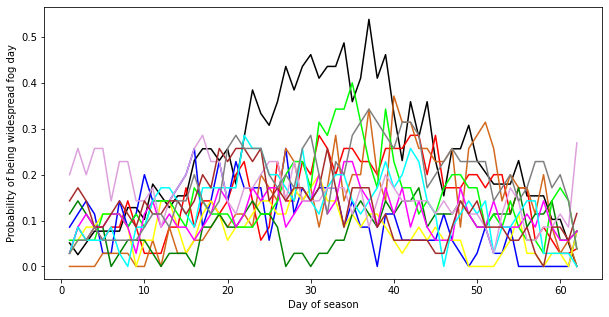

In [7]:
fig = plt.figure(figsize=(10,5))
#fig=plt.figure(figsize=[20,10])
x=np.arange(1,63)
fCC=list()
#fMean=list()
#fCV=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]
classes = ['y','ACCESS-CM2','CanESM','IITM-ESM','INM-CM4-8','INM-CM5-0','IPSL-CM6A-LR','MIROC6','MRI-ESM2-0','MPI-ESM1-2-LR','MPI-ESM1-2-HR','EC-Earth3']
class_colours = ['black','red','blue','chocolate','yellow','green','lime','magenta','aqua','plum','brown','grey']
fList=(y,ACCESS_CM2_CNN,CanESM5_CNN,IITMESM_CNN,INM_CM4_8_CNN,INM_CM5_0_CNN ,IPSL_CM6A_LR_CNN,MIROC6_CNN,MRI_ESM2_0_CNN, MPI_ESM1_2_LR_CNN, MPI_ESM1_2_HR_CNN,EC_Earth3_CNN)
for (fL, cL, cO) in zip(fList,classes,class_colours):

    ts1=getSeasonalCycle(fL)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    #fMean.append((ts))
    fCC.append(xr.corr(ts, OTs))
    plt.plot(x,ts,label=cL, color=cO)

plt.xlabel('Day of season')
plt.ylabel('Probability of being widespread fog day')    
#plt.legend()
plt.savefig('WFogProb_SC.png')
#plt.savefig('WFogProb_SC_legend.png')
print(fCC)

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

y
ACCESS-CM2
CanESM
IITM-ESM
INM-CM4-8
INM-CM5-0
IPSL-CM6A-LR
MIROC6
MRI-ESM2-0
MPI-ESM1-2-LR
MPI-ESM1-2-HR
EC-Earth3


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


[array(1.), array(0.7039052), array(0.21932166), array(0.60556305), array(0.46537259), array(0.00958851), array(0.71149869), array(0.556432), array(0.67341329), array(-0.07111676), array(0.28804683), array(0.69104564)]


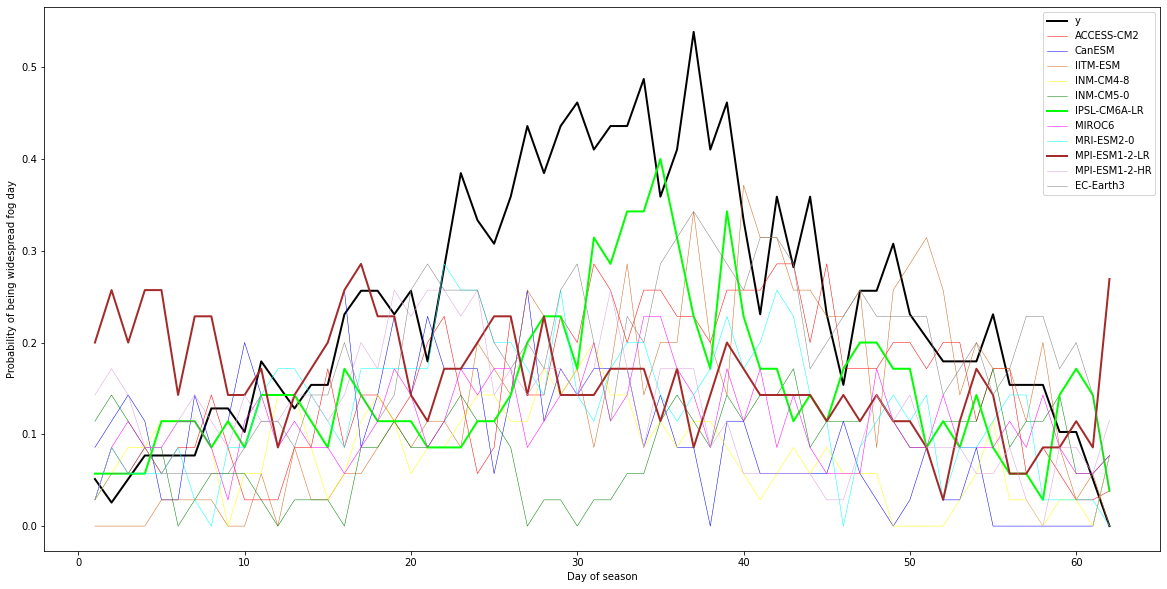

In [11]:
#fig = plt.figure(figsize=(10,5))
fig=plt.figure(figsize=[20,10])
x=np.arange(1,63)
fCC=list()
#fMean=list()
#fCV=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]
classes = ['y','ACCESS-CM2','CanESM','IITM-ESM','INM-CM4-8','INM-CM5-0','IPSL-CM6A-LR','MIROC6',
           'MRI-ESM2-0','MPI-ESM1-2-LR','MPI-ESM1-2-HR','EC-Earth3']
class_colours = ['black','red','blue','chocolate','yellow','green','lime','magenta','aqua','brown','plum','grey']
widths=[2,0.5,0.5,0.5,0.5,0.5,2,0.5,0.5,2,0.5,0.5]
fList=(y,ACCESS_CM2_CNN,CanESM5_CNN,IITMESM_CNN,INM_CM4_8_CNN,INM_CM5_0_CNN ,IPSL_CM6A_LR_CNN,MIROC6_CNN,MRI_ESM2_0_CNN, MPI_ESM1_2_LR_CNN, MPI_ESM1_2_HR_CNN,EC_Earth3_CNN)
for (fL, cL, cO,l) in zip(fList,classes,class_colours,widths):

    ts1=getSeasonalCycle(fL)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    #fMean.append((ts))
    fCC.append(xr.corr(ts, OTs).values)
    plt.plot(x,ts,label=cL, color=cO,linewidth=l)

plt.xlabel('Day of season')
plt.ylabel('Probability of being widespread fog day')    
plt.legend()
#plt.savefig('WFogProb_SC.png')
plt.savefig('WFogProb_SC_legend.png')
print(fCC)

In [10]:
x=(32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31)

In [11]:
#plt.plot(x,obsS)

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

0.06643357
OKK
6.4935064
9.35065
7.532468
8.311689
9.35065
7.532468
9.870131
7.532468
7.012987
7.7922077
9.35065
9.61039
11.948052
11.948052
10.389611
13.246754
12.987013
15.584416
15.064937
14.545454
16.623379
16.883118
15.584416
16.103897
16.363638
16.623379
15.064937
15.064937
17.142859
15.584415
18.18182
17.4026
18.181818
17.402597
18.961042
18.181818
17.662338
14.025974
17.662338
17.922077
16.883118
17.92208
16.883118
14.025974
12.987015
12.207793
13.246754
11.688313
13.246756
12.467534
11.948052
11.168831
9.870131
11.688313
10.909092
9.870131
6.4935064
8.051949
8.831169
6.7532473
6.4935064
6.6433573


<xarray.DataArray 'fogdata' (dayofyear: 62)>
array([0.06493507, 0.0935065 , 0.07532468, 0.08311689, 0.0935065 ,
       0.07532468, 0.09870131, 0.07532468, 0.07012987, 0.07792208,
       0.0935065 , 0.0961039 , 0.11948052, 0.11948052, 0.10389611,
       0.13246754, 0.12987013, 0.15584417, 0.15064937, 0.14545454,
       0.16623378, 0.16883117, 0.15584417, 0.16103896, 0.16363639,
       0.16623378, 0.15064937, 0.15064937, 0.17142859, 0.15584415,
       0.1818182 , 0.174026  , 0.18181819, 0.17402598, 0.18961042,
       0.18181819, 0.17662339, 0.14025974, 0.17662339, 0.17922078,
       0.16883117, 0.1792208 , 0.16883118, 0.14025974, 0.12987015,
       0.12207793, 0.13246754, 0.11688313, 0.13246755, 0.12467534,
       0.11948052, 0.11168831, 0.09870131, 0.11688313, 0.10909092,
       0.09870131, 0.06493507, 0.08051948, 0.08831169, 0.06753247,
       0.06493507, 0.06643357], dtype=float32)
Coordinates:
  * dayofyear  (dayofyear) int64 336 337 338 339 340 341 ... 27 28 29 30 31 335

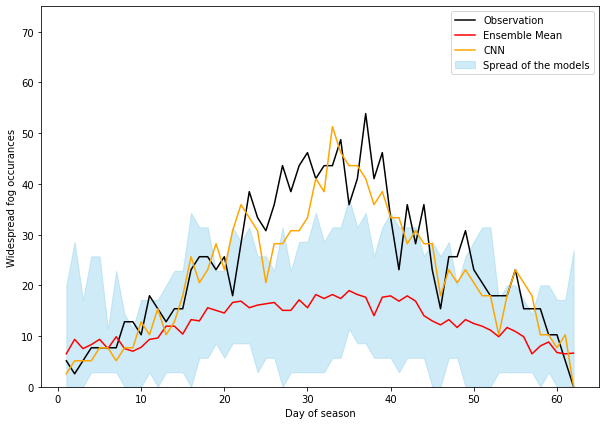

In [15]:
fig = plt.figure(figsize=(10,7))
#fig = plt.figure(figsize=(10,5))
x=np.arange(1,63)
#fMean=list()
fCC=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]
OTs

CNNTs1=getSeasonalCycle(CNN)
CNNTs2=CNNTs1.roll(dayofyear=31)
CNNTs=CNNTs2[(CNNTs2.dayofyear<366) | (CNNTs2.dayofyear>366)]
CNNTs

MTs=[]

fList=(ACCESS_CM2_CNN,CanESM5_CNN,IITMESM_CNN,INM_CM4_8_CNN,INM_CM5_0_CNN ,
       IPSL_CM6A_LR_CNN,MIROC6_CNN,MRI_ESM2_0_CNN, MPI_ESM1_2_LR_CNN, 
       MPI_ESM1_2_HR_CNN,EC_Earth3_CNN)

for fL in fList:
    ts1=getSeasonalCycle(fL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    MTs.append(ts)
    
    
MS=np.array(MTs)
print(np.mean(MS[:,61]))

meanMS=np.mean(MS, axis=0)
minMS=np.amin(MS,axis=0)
maxMS=np.amax(MS,axis=0)

x=np.arange(1,63)


plt.fill_between(x, maxMS*100.0,minMS*100.0,
                 color="skyblue", alpha=0.4,label='Spread of the models')
#plt.fill_between(x, minMS,
#                 color="white", alpha=0.4)
plt.plot(x,OTs*100.0,label='Observation', color='black')
plt.plot(x,meanMS*100.0,label='Ensemble Mean', color='red')
plt.plot(x,CNNTs*100.0,label='CNN', color='orange')
plt.ylim([0.00, 75])
    
plt.xlabel('Day of season')
plt.ylabel('Widespread fog occurances')     
plt.legend()

plt.savefig('WFD_SC_ModelsSpread.eps')

print('OKK')
print('\n'.join(map(str, meanMS*100))) 

ensTs=OTs.copy()
ensTs.values=meanMS
dump(ensTs,'../../April2021/Future_projection_plots/WFD_historical_ensembleMean.joblib')
ensTs
